# (A) how to make a static map

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

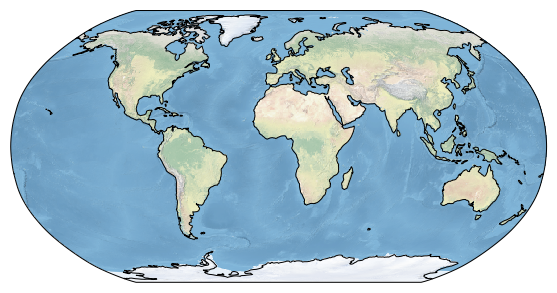

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

plt.show()

# (B) How to put points, lines and polygons (shape data) on the map

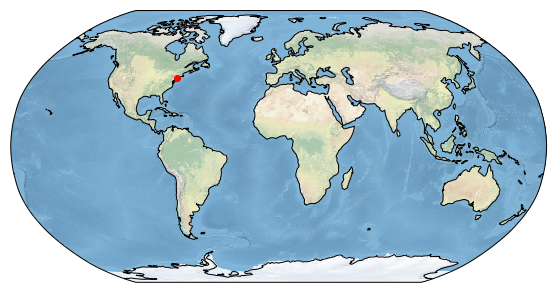

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()
#40.7128° N, 74.0060° W
ax.plot(360 -74.0060, 40.7128, 'o', color='R', transform=ccrs.PlateCarree())
plt.show()


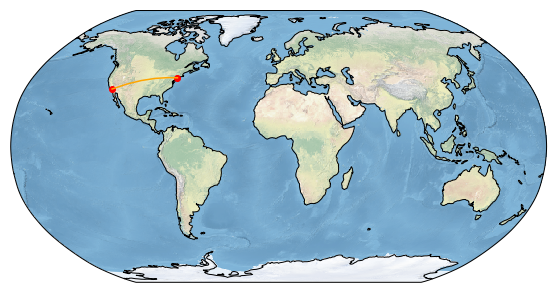

In [5]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.stock_img()
ax.coastlines()
#40.7128° N, 74.0060° W
#34.0522° N, 118.2437° W
ax.plot(360 -74.0060, 40.7128, 'o', color='R', transform=ccrs.PlateCarree())
ax.plot(360 -118.2437,34.0522 , 'o', color='R', transform=ccrs.PlateCarree())
ax.plot([ 360-118.2437, 360-74.0060], [34.0522, 40.7128], transform=ccrs.Geodetic(), color='orange')
plt.show()


In [6]:
import cartopy.io.shapereader as shpreader

# can also be a shape file
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

In [7]:
reader = shpreader.Reader(shpfilename)
countries = reader.records()
country = next(countries)

In [8]:
country

<Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x7f7bd8bbeef0>, {'featurecla': 'Admin-0 country', 'scalerank': 1, 'LABELRANK': 6, 'SOVEREIGNT': 'Fiji', 'SOV_A3': 'FJI', 'ADM0_DIF': 0, 'LEVEL': 2, 'TYPE': 'Sovereign country', 'ADMIN': 'Fiji', 'ADM0_A3': 'FJI', 'GEOU_DIF': 0, 'GEOUNIT': 'Fiji', 'GU_A3': 'FJI', 'SU_DIF': 0, 'SUBUNIT': 'Fiji', 'SU_A3': 'FJI', 'BRK_DIFF': 0, 'NAME': 'Fiji', 'NAME_LONG': 'Fiji', 'BRK_A3': 'FJI', 'BRK_NAME': 'Fiji', 'BRK_GROUP': '', 'ABBREV': 'Fiji', 'POSTAL': 'FJ', 'FORMAL_EN': 'Republic of Fiji', 'FORMAL_FR': '', 'NAME_CIAWF': 'Fiji', 'NOTE_ADM0': '', 'NOTE_BRK': '', 'NAME_SORT': 'Fiji', 'NAME_ALT': '', 'MAPCOLOR7': 5, 'MAPCOLOR8': 1, 'MAPCOLOR9': 2, 'MAPCOLOR13': 2, 'POP_EST': 920938, 'POP_RANK': 11, 'GDP_MD_EST': 8374.0, 'POP_YEAR': 2017, 'LASTCENSUS': 2007, 'GDP_YEAR': 2016, 'ECONOMY': '6. Developing region', 'INCOME_GRP': '4. Lower middle income', 'WIKIPEDIA': -99, 'FIPS_10_': 'FJ', 'ISO_A2': 'FJ', 'ISO_A3': 'FJI', 'ISO_A3_EH': 'FJI', 'I

In [9]:
country.attributes.keys()

dict_keys(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM', 'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN', 'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME

In [10]:
country.attributes['INCOME_GRP']

'4. Lower middle income'

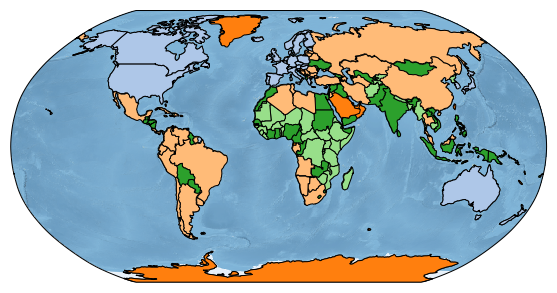

In [11]:
import matplotlib.cm as mcm

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.stock_img()
ax.coastlines()
#40.7128° N, 74.0060° W
#34.0522° N, 118.2437° W
for cgeo, crec in zip(reader.geometries(), reader.records()):
    inc_code = int(crec.attributes['INCOME_GRP'].split('.')[0])
    fc = mcm.tab20(inc_code)
    ax.add_geometries([cgeo], ccrs.PlateCarree(), edgecolor='k', facecolor=fc)
plt.show()


# (C) How to put an image on (under) a map ... could be a heatmap or sat image

In [23]:
import xarray as xr

In [25]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

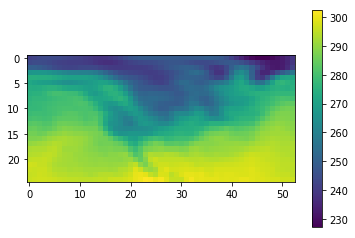

In [30]:
im = plt.imshow(ds['air'][0])
_ = plt.colorbar(im)

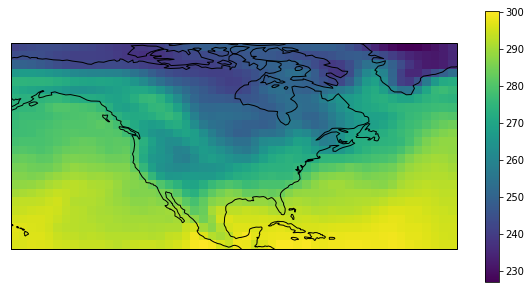

In [64]:
# let's map

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# make the map global rather than have it zoom in to
# the extents of any plotted data

im = ax.pcolor(ds['lon'].values, ds['lat'].values, ds['air'][0].values, 
               transform=ccrs.PlateCarree())
ax.coastlines()
fig.colorbar(im, ax=ax)
plt.show()


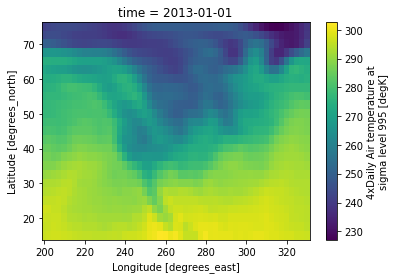

In [73]:
ds['air'][0].plot()